# Project # 2
## Overview:

## Objective: Create a model to classify emails as spam or not spam.

### Description: 
This project uses a dataset of emails labeled as spam or not spam to train a classifier that can automatically detect spam emails. The key steps include data cleaning and preprocessing (e.g., text preprocessing, tokenization), feature extraction (e.g., TF-IDF), model selection and training (e.g., Naive Bayes, SVM), and model evaluation and fine-tuning.

### Dataset:
The synthetic dataset is designed to enhance natural language processing skills. The data is taken form kiggle website.

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#pip install wordcloud 
#pip install nltk
#import nltk
#nltk.download()

#### Load Dataset

In [3]:
df=pd.read_csv("email_classification.csv")
df.head(3)

,email,label
0,Upgrade to our premium plan for exclusive acce...,ham
1,Happy holidays from our team! Wishing you joy ...,ham
2,We're hiring! Check out our career opportuniti...,ham


## Exploratory Data Analysis

#### Data Cleaning

In [4]:
# Columns names
df.columns

Index(['email', 'label'], dtype='object')

In [5]:
# Reorder the columns
df = df[["label","email"]]
df.head(3)

,label,email
0,ham,Upgrade to our premium plan for exclusive acce...
1,ham,Happy holidays from our team! Wishing you joy ...
2,ham,We're hiring! Check out our career opportuniti...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   179 non-null    object
 1   email   179 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB


In [7]:
df['label'].value_counts()

label
ham     100
spam     79
Name: count, dtype: int64

In [8]:
# check null values
df.isnull().sum()

label    0
email    0
dtype: int64

In [9]:
# check duplicates values 
df.duplicated().sum()

29

In [10]:
# remove duplicates values
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df["label"].value_counts()

label
ham     100
spam     50
Name: count, dtype: int64

##### Interpretation:
Initially, the dataset contained 100 "ham" (non-spam) emails and 79 "spam" emails. After cleaning the data, which involved removing 29 duplicate entries and ensuring there were no missing values, the dataset now consists of 100 "ham" emails and 50 "spam" emails.

## Data Visualization

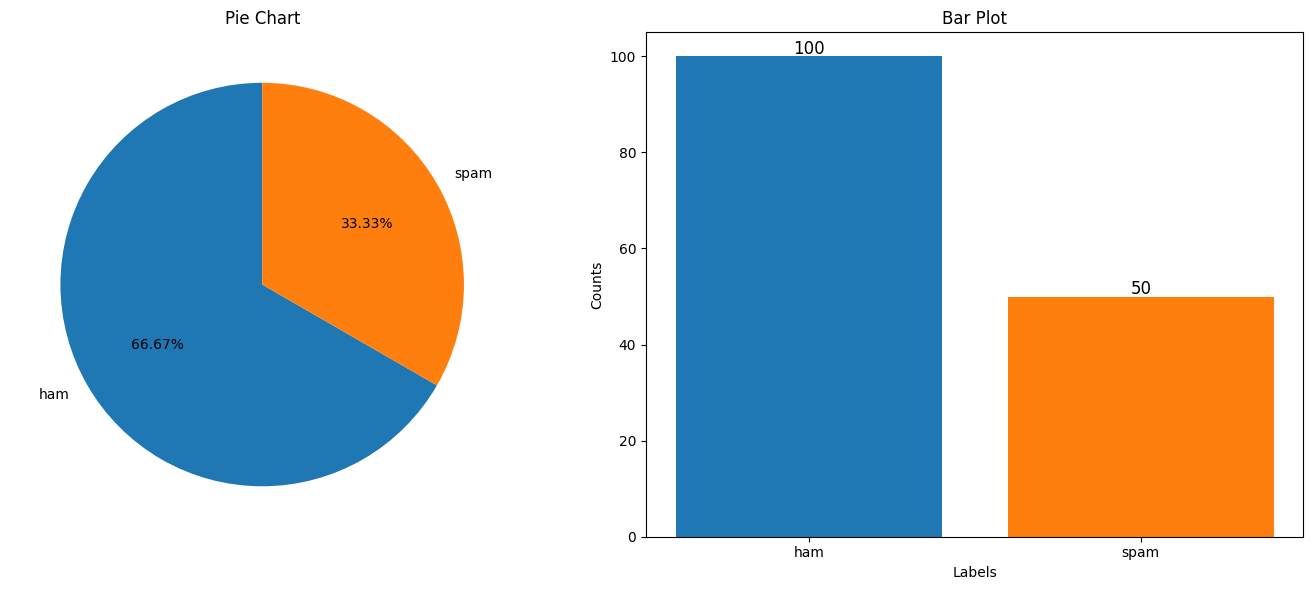

In [13]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Data preparation
counts = df["label"].value_counts()
labels = counts.index  # Get the original label names
counts_values = counts.values  # Get the counts

# Create a figure and axes for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart on the first subplot
colors = ["#1f77b4", "#ff7f0e"]
axes[0].pie(counts_values, labels=labels, autopct="%0.2f%%", startangle=90, colors=colors)
axes[0].set_title("Pie Chart")


# Bar plot on the second subplot
bars = axes[1].bar(labels, counts_values, color=colors)
axes[1].set_title("Bar Plot")
axes[1].set_xlabel("Labels")
axes[1].set_ylabel("Counts")

# Adding count labels on top of the bar plot
for i, count in enumerate(counts_values):
    axes[1].text(i, count + 0.5, str(count), ha='center', fontsize=12)



# Set x-ticks to be the labels, and ensure proper alignment
axes[1].set_xticks(range(len(labels)))
axes[1].set_xticklabels(labels)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


#### Interpretation:
**Pie Chart:** Shows the distribution of emails, with 66.67% ham (non-spam) and 33.33% spam.

**Bar Plot:** Compares the counts of ham and spam emails, with 100 ham and 50 spam emails.

## Data Preprocessing

In [14]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder
encoder = LabelEncoder()

df["label"] = encoder.fit_transform(df["label"])

### Text Length and Structure Analysis

In [15]:
# Importing NLTK for natural language processing
import nltk

# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt') 

# Importing stopwords
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Naveed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Naveed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
df["num_characters"] = df["email"].apply(len)
df['num_words'] = df['email'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['email'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head(3)

,label,email,num_characters,num_words,num_sentence
0,0,Upgrade to our premium plan for exclusive acce...,81,14,1
1,0,Happy holidays from our team! Wishing you joy ...,73,14,2
2,0,We're hiring! Check out our career opportuniti...,75,15,2


##### Descriptive Statistics of Emails

In [17]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,150.000000,150.000000,150.000000
mean,77.393333,15.553333,2.053333
std,10.537817,2.141118,0.380509
min,52.000000,11.000000,1.000000
25%,69.250000,14.000000,2.000000
50%,78.000000,15.000000,2.000000
75%,85.000000,17.000000,2.000000
max,107.000000,22.000000,3.000000


##### Summary Statistics for ham emails

In [18]:
df[df['label'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,100.000000,100.000000,100.000000
mean,78.680000,15.740000,1.980000
std,9.073082,2.130206,0.317185
min,52.000000,11.000000,1.000000
25%,73.000000,14.000000,2.000000
50%,79.000000,15.000000,2.000000
75%,85.000000,17.000000,2.000000
max,98.000000,22.000000,3.000000


##### Summary Statistics for spam emails

In [19]:
df[df['label'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,50.000000,50.000000,50.000000
mean,74.820000,15.180000,2.200000
std,12.696922,2.135129,0.451754
min,56.000000,12.000000,1.000000
25%,64.500000,14.000000,2.000000
50%,73.000000,15.000000,2.000000
75%,83.750000,16.000000,2.000000
max,107.000000,21.000000,3.000000


#### Interpretation:
The summary statistics shows that both spam and non-spam emails have similar lengths and structures, with non-spam emails being slightly longer on average.

#### Character Length Distribution for ham and Spam emails

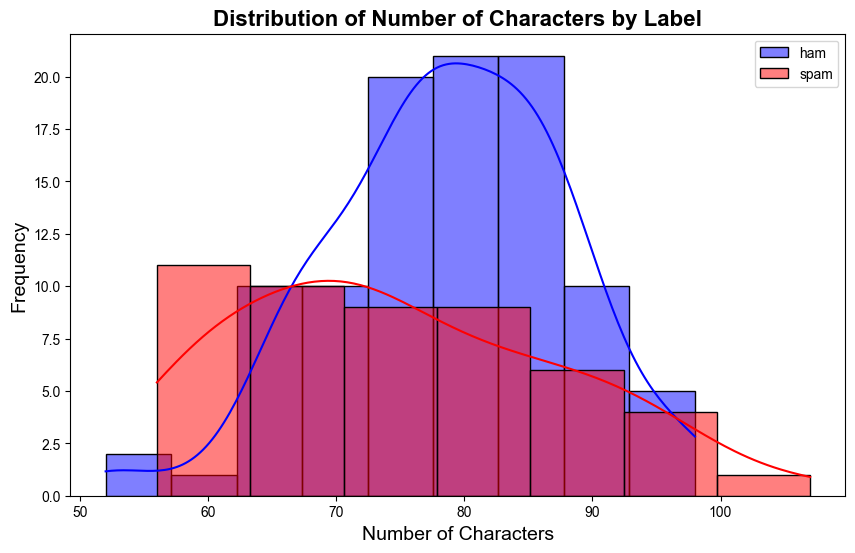

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for label 0 in blue
sns.histplot(df[df['label'] == 0]['num_characters'], color='blue', label='ham', kde=True)

# Plot the histogram for label 1 in red
sns.histplot(df[df['label'] == 1]['num_characters'], color='red', label='spam', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Label', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

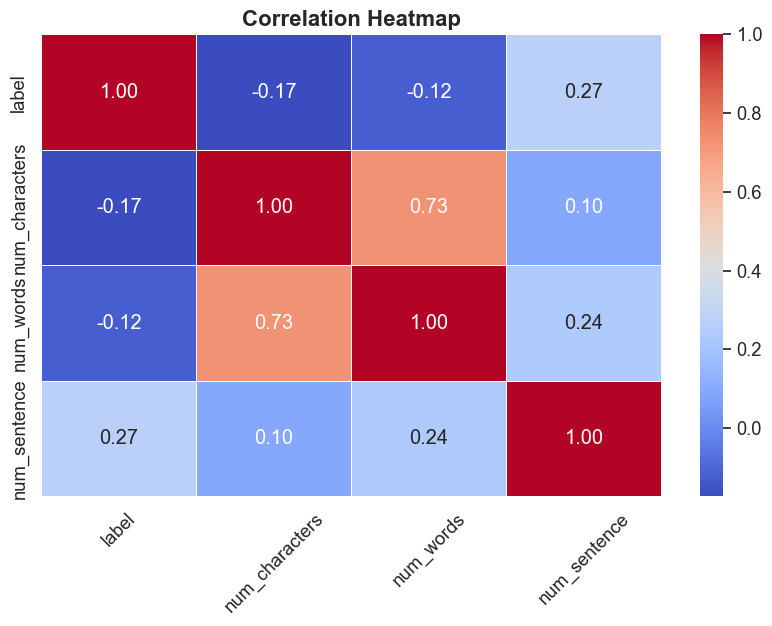

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the correlation matrix
correlation_matrix = df[['label', 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()

 ## Feature extraction

In [22]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing stop words and punctuation
    text = y[:]
    y.clear()
    
    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)

In [23]:
transform_text('Upgrade to our premium plan for exclusive access to premium content and features.')

'upgrad premium plan exclus access premium content featur'

In [24]:
df['transformed_text'] = df['email'].apply(transform_text)

#### Word Cloud for Spam Email

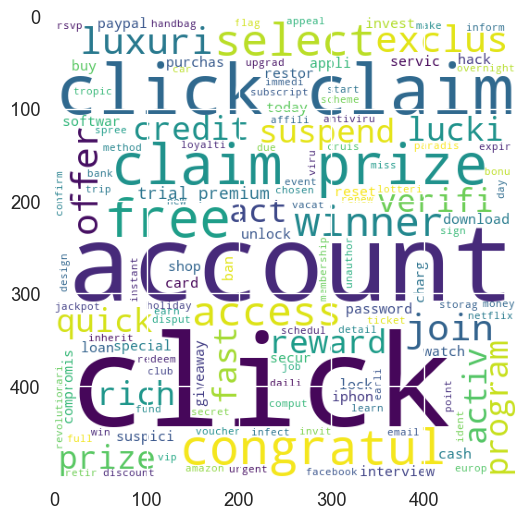

In [25]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

#### Word Cloud for Ham Email

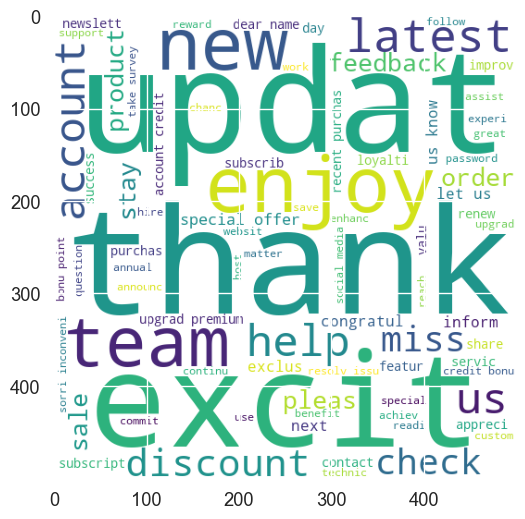

In [26]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

#### Term Frequency-Inverse Document Frequency Vectorizer

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfid = TfidfVectorizer()

In [28]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['label'].values


## Predictive Models 

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 2)

In [30]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix,f1_score,recall_score

In [31]:
svc = SVC()
xgb  = XGBClassifier()
rfc = RandomForestClassifier()
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()   

In [32]:
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
print(accuracy_score(y_test,svc_pred))
print(precision_score(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))

0.9555555555555556
1.0
[[30  0]
 [ 2 13]]


In [33]:
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
print(accuracy_score(y_test,xgb_pred))
print(precision_score(y_test,xgb_pred))
print(confusion_matrix(y_test,xgb_pred))

0.9777777777777777
1.0
[[30  0]
 [ 1 14]]


In [34]:
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print(accuracy_score(y_test,rfc_pred))
print(precision_score(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

1.0
1.0
[[30  0]
 [ 0 15]]


In [35]:
mnb.fit(X_train,y_train)
mnb_pred = mnb.predict(X_test)
print(accuracy_score(y_test,mnb_pred))
print(precision_score(y_test,mnb_pred))
print(confusion_matrix(y_test,mnb_pred))

0.9333333333333333
1.0
[[30  0]
 [ 3 12]]


In [36]:
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
print(accuracy_score(y_test,gnb_pred))
print(precision_score(y_test,gnb_pred))
print(confusion_matrix(y_test,gnb_pred))

0.9111111111111111
0.9230769230769231
[[29  1]
 [ 3 12]]


In [37]:
bnb.fit(X_train,y_train)
bnb_pred = bnb.predict(X_test)
print(accuracy_score(y_test,bnb_pred))
print(precision_score(y_test,bnb_pred))
print(confusion_matrix(y_test,bnb_pred))

0.9777777777777777
1.0
[[30  0]
 [ 1 14]]


#### Confusion Matrix plot

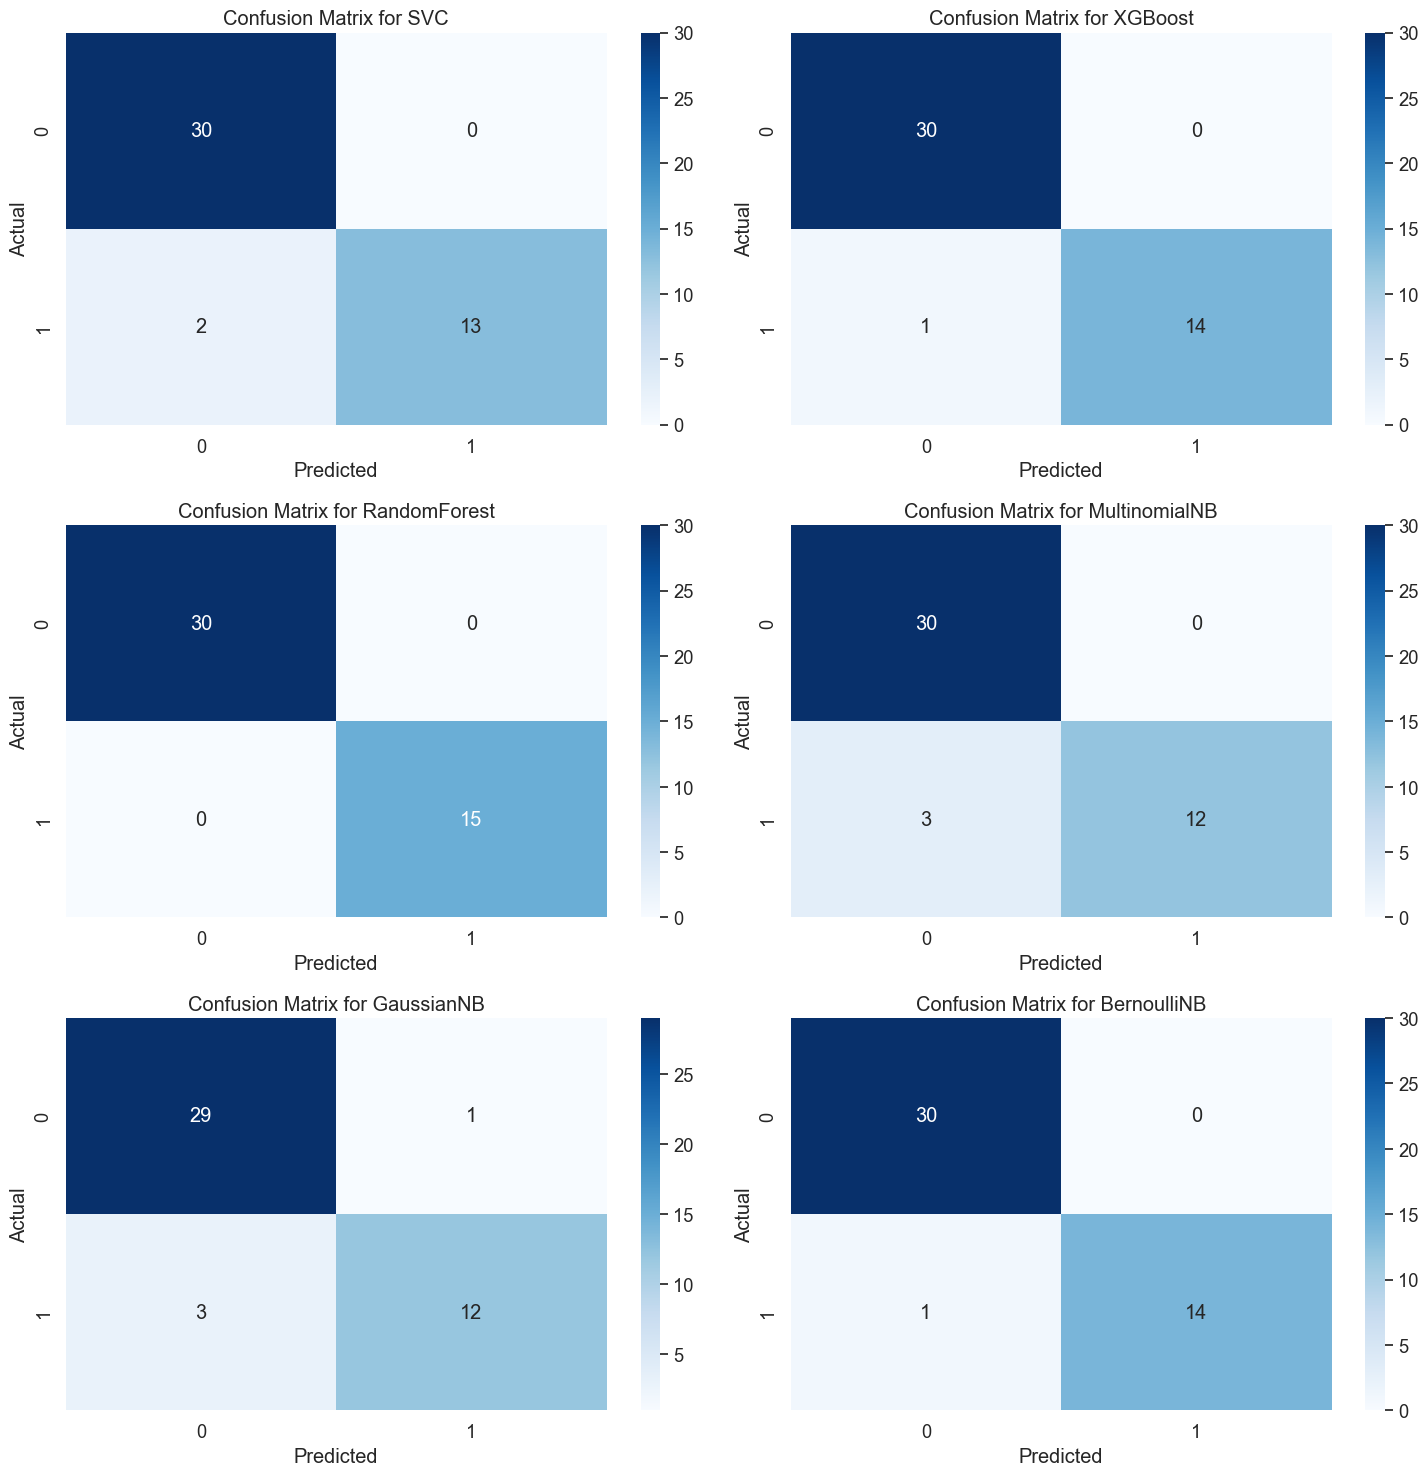

In [38]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot confusion matrix for each model
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

models = ['SVC', 'XGBoost', 'RandomForest', 'MultinomialNB', 'GaussianNB', 'BernoulliNB']
predictions = [svc_pred, xgb_pred, rfc_pred, mnb_pred, gnb_pred, bnb_pred]

for ax, model, pred in zip(axes, models, predictions):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'Confusion Matrix for {model}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


#### Accuracy and Precision plot

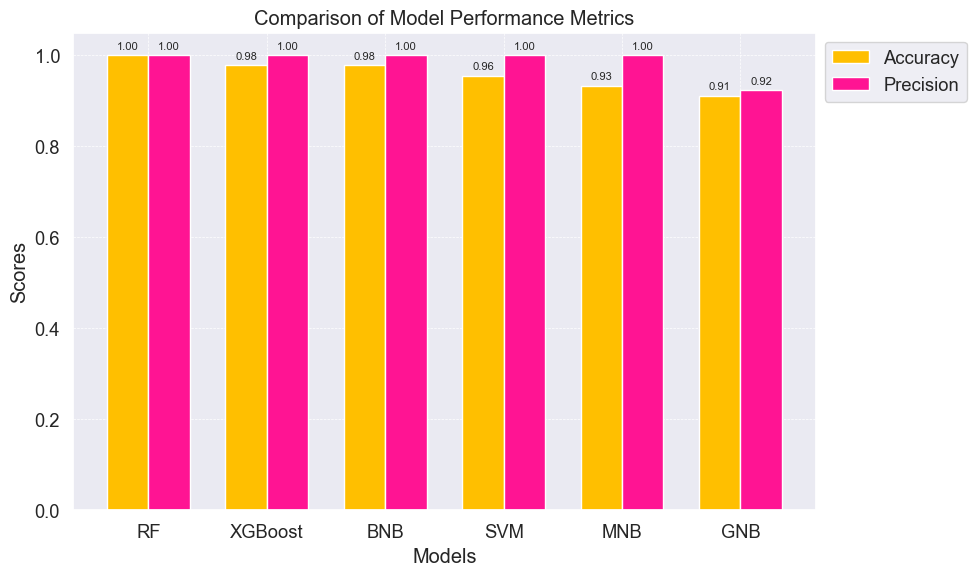

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ['Accuracy', 'Precision']
models = ['RF', 'XGBoost','BNB','SVM', 'MNB', 'GNB']
values = np.array([
    [1.0, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556,   0.9333333333333333, 0.9111111111111111, ],  # Accuracy
    [1.0, 1.0, 1.0, 1.0,1.0, 0.9230769230769231]  # Precision
])

# Colors
colors = ['#FFBF00', '#FF1493']  # Colors used in the previous plot

# Plotting
x = np.arange(len(models))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric as a group of bars
for i, (metric, color) in enumerate(zip(metrics, colors)):
    bars = ax.bar(x + i * width, values[i], width, label=metric, color=color)
    # Add text annotations on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(models)

# Move legend outside
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add dashed grid lines
ax.yaxis.grid(True, linestyle='--', linewidth=0.5)
ax.xaxis.grid(True, linestyle='--', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()


## Conclusion:

The comparison of model performance metrics reveals that the Random Forest is the most effective for classifying emails as spam or not spam, achieving perfect scores of 1.0 in both accuracy and precision. The XGBoost and Bernoulli Naive Bayes models are perform similar, with an accuracy of 0.98 and perfect precision of 1.0. The Multinomial Naive Bayes and Gaussian Naive Bayes models showed similar performance, with accuracy around 0.9333 and 0.9111 respectively, and precision scores of 1.0 and 0.92. In contrast, the Support Vector Machine had higher performance than Multinomial Naive Bayes and Gaussian Naive Bayes , with an accuracy of 0.96 and precision of 1.0. Overall, Random Forest are the top-performing models, while Gaussian Naive Bayes is the least effective for this classification task.